# Digit Recognizer (Keras)

1. Data Exploration
    1. Load Data
    2. Visualizing the number of training examples per label
    3. Reshape
    4. Normalization
    5. Label Encoding
2. Training the model
    1. Simple Neural Network
    2. CNN
    3. Large CNN
        1. Network Arhcitecture
        2. Data Augmentation
        3. Slowing down learning rate
3. Evaluate the model
    1. Training and Validation Curves
    2. Incorrectly classified examples

## Part 1. Data Exploration

In [2]:
# Imports
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


%matplotlib inline

/scratch/user/achadha7/.conda/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1.1 Load data

In [3]:
# Download the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Shape of X_train: {0}".format(X_train.shape))
print("Shape of y_train: {0}".format(y_train.shape))
print("")
print("Number of training samples: {0}".format(X_train.shape[0]))
print("Number of testing samples: {0}".format(X_test.shape[0]))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)

Number of training samples: 60000
Number of testing samples: 10000


In [5]:
print(X_train.dtype)
print(X_train[4559].shape)

uint8
(28, 28)


View some images present in the training dataset

<function matplotlib.pyplot.show(*args, **kw)>

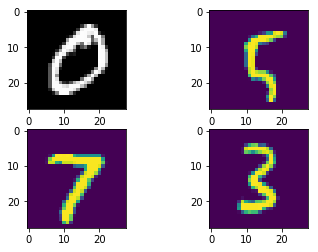

In [6]:
plt.subplot(221)
plt.imshow(X_train[1],cmap='gray')
plt.subplot(222)
plt.imshow(X_train[100])
plt.subplot(223)
plt.imshow(X_train[4559])
plt.subplot(224)
plt.imshow(X_train[50000])
plt.show

### 1.2 Visualizing the number of training examples per label

In [7]:
train_labels_count = Counter(y_train)
print("Number of training examples per class:")
train_labels_count

Number of training examples per class:


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

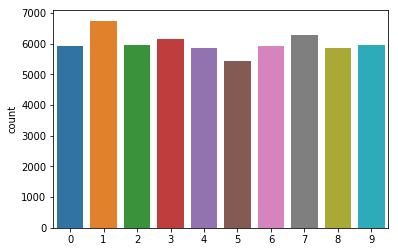

In [8]:
sns.countplot(y_train)

 ### 1.3 Reshape
 Flatten 28*28 images to a 784 vector for each image

In [9]:
train_count = X_train.shape[0]
test_count = X_test.shape[0]
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(train_count, -1).astype('float32')
X_test = X_test.reshape(test_count, -1).astype('float32')

### 1.4 Normalize the data from 0-255 to 0-1

In [10]:
X_train = X_train/255
X_test = X_test/255

### 1.5 Label Encoding
Since this is a multi-class classification problem, use one-hot encoding of the class values.
Transforming the vector of class integers into a binary matrix

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print("Number of labels: {0}".format(num_classes))

Number of labels: 10


## Part 2: Training the model
### 2.1 Simple Neural Network
* One hidden layer
* Number of neurons same as number of inputs (784)
* ReLU used for hidden layer.
* Softmax activation function for output layer
* Loss function - Logarithmic loss (categorical_crossentropy in Keras)
* Learning Algorithm - ADAM gradient descent to learn the weights

In [12]:
def simple_nn():
    # Create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# Build the model
simple_nn_model = simple_nn()
simple_nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


/scratch/user/achadha7/.conda/envs/ML/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`


In [16]:
# Fit the model
simple_nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = simple_nn_model.evaluate(X_test, y_test, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0060 - acc: 0.9990 - val_loss: 0.0561 - val_acc: 0.9825
Epoch 2/10
 - 1s - loss: 0.0055 - acc: 0.9989 - val_loss: 0.0642 - val_acc: 0.9817
Epoch 3/10
 - 1s - loss: 0.0040 - acc: 0.9994 - val_loss: 0.0596 - val_acc: 0.9833
Epoch 4/10
 - 1s - loss: 0.0027 - acc: 0.9997 - val_loss: 0.0601 - val_acc: 0.9832
Epoch 5/10
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0585 - val_acc: 0.9842
Epoch 6/10
 - 1s - loss: 9.0390e-04 - acc: 1.0000 - val_loss: 0.0599 - val_acc: 0.9838
Epoch 7/10
 - 1s - loss: 7.0662e-04 - acc: 1.0000 - val_loss: 0.0590 - val_acc: 0.9846
Epoch 8/10
 - 1s - loss: 6.9196e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9827
Epoch 9/10
 - 1s - loss: 0.0247 - acc: 0.9920 - val_loss: 0.0763 - val_acc: 0.9804
Epoch 10/10
 - 1s - loss: 0.0066 - acc: 0.9981 - val_loss: 0.0605 - val_acc: 0.9848
Testing Error: 1.52%


### Performance:
* Training data accuracy = 99.81%
* Testing data accuracy = 98.48%
* Testing data error = 1.52%

### 2.2 CNN
* To train the model with CNN, we need to reshape the dataset.
* Layers used for 2-dimension convolutions expect dimensions (number of channels, width, height)
* For grayscale images, number of channels 1

### Network Architecture
1. First hidden layer - convolutional layer - Convolution2D
    * Has 32 feature maps
    * Filters size 5* 5
    * ReLu Activation function
    * Input Layer
2. Pooling Layer - Takes max
    * MaxPooling2D
    * Pool Size 2 * 2
3. Dropout - Regularization layer\
    * Randomly exclude 20% of neurons in the layer to prevent overfitting
4. Flatten - Converts the 2D matrix dataq to vector
* Fully Connected Layer 
    * 128 neurons
    * ReLU Activation function
5. Output Layer
    * 10 neurons
    * 10 classes
    * Softmax activation function

Using:
* Logarithmic loss
* Adam gradient descent

In [21]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
K.set_image_dim_ordering('th')

In [22]:
X_train = X_train.reshape(train_count, 1, 28, 28).astype('float32')
X_test = X_test.reshape(test_count, 1, 28, 28).astype('float32')

In [23]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
# Build the model
cn_model = cnn_model()
cn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


* Run for 10 epochs
* Batch size 200

In [25]:
# Fit the model
cn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = cn_model.evaluate(X_test, y_test, verbose=2)
print("CNN error: %2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2489 - acc: 0.9288 - val_loss: 0.0831 - val_acc: 0.9732
Epoch 2/10
 - 3s - loss: 0.0781 - acc: 0.9773 - val_loss: 0.0556 - val_acc: 0.9818
Epoch 3/10
 - 3s - loss: 0.0528 - acc: 0.9839 - val_loss: 0.0430 - val_acc: 0.9852
Epoch 4/10
 - 3s - loss: 0.0429 - acc: 0.9868 - val_loss: 0.0363 - val_acc: 0.9868
Epoch 5/10
 - 3s - loss: 0.0339 - acc: 0.9892 - val_loss: 0.0343 - val_acc: 0.9885
Epoch 6/10
 - 3s - loss: 0.0299 - acc: 0.9906 - val_loss: 0.0309 - val_acc: 0.9899
Epoch 7/10
 - 3s - loss: 0.0245 - acc: 0.9926 - val_loss: 0.0372 - val_acc: 0.9871
Epoch 8/10
 - 3s - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0312 - val_acc: 0.9894
Epoch 9/10
 - 3s - loss: 0.0175 - acc: 0.9945 - val_loss: 0.0331 - val_acc: 0.9889
Epoch 10/10
 - 3s - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0326 - val_acc: 0.9888
CNN error: 1.120000%


### Performance
* Training Data accuracy - 99.51%
* Testing Data Accuracy - 98.88
* Testing Data error - 1.12%

### 2.3 Larger CNN

### 2.3.1 Network Architecture
1. Convolutional Layer
    * 30 feature maps
    * Size 5 by 5
2. Pooling Layer
    * Max
    * 2 by 2 patches
3. Convolutional Layer
    * Feature Maps 15
    * Size 3 by 3
4. Pooling Layer
    * Max
    * 2 by 2 patches
5. Dropout layer with probablity of 20%
6. Flatten layer
7. FC layer - 128 neurons; ReLU
8. FC layer - 50 neurons; ReLU
9. Output Layer

In [26]:
def cnn_large_model():
    # create model
    model=Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### 2.3.2 Reducing Learning Rate
Setting a callback to reduce learning rate when val_acc has stopped improving

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=2,
                                           factor=0.5,
                                           min_lr=0.00001)
epochs=25
batch_size=150

### 2.3.3 Data Augmentation
* Randomly rotate some training images by 10 degrees
* Randomly Zoom by 10% some training images
* Randomly shift images horizontally by 10% of the width
* Randomly shift images vertically by 10% of the height

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False, # set each sample mean to 0
        featurewise_std_normalization=False, # divide inputs by std of 
        samplewise_std_normalization=False, # divide each input by its std
        zca_whitening=False, # apply ZCA whitening
        rotation_range=10, # randomly rotate images in the range
        zoom_range=0.1, # randomly zoom image
        width_shift_range=0.1, #Randomly shift images horizontally
        height_shift_range=0.1, # Randomly shift images vertically
        horizontal_flip=False, # Randomly flip images
        vertical_flip=False)

datagen.fit(X_train)

In [29]:
# build the model
large_model = cnn_large_model()
large_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               48128     
__________

In [32]:
# Fit the mode
history = large_model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                validation_data=(X_test, y_test), epochs=epochs
               , verbose=2,
                callbacks=[learning_rate_reduction])


Epoch 1/25
 - 9s - loss: 0.2019 - acc: 0.9381 - val_loss: 0.0482 - val_acc: 0.9842
Epoch 2/25
 - 9s - loss: 0.1450 - acc: 0.9554 - val_loss: 0.0489 - val_acc: 0.9844
Epoch 3/25
 - 9s - loss: 0.1136 - acc: 0.9655 - val_loss: 0.0522 - val_acc: 0.9833
Epoch 4/25
 - 9s - loss: 0.1013 - acc: 0.9686 - val_loss: 0.0295 - val_acc: 0.9900
Epoch 5/25
 - 9s - loss: 0.0874 - acc: 0.9733 - val_loss: 0.0308 - val_acc: 0.9894
Epoch 6/25
 - 9s - loss: 0.0837 - acc: 0.9743 - val_loss: 0.0283 - val_acc: 0.9903
Epoch 7/25
 - 9s - loss: 0.0714 - acc: 0.9774 - val_loss: 0.0227 - val_acc: 0.9916
Epoch 8/25
 - 9s - loss: 0.0718 - acc: 0.9776 - val_loss: 0.0280 - val_acc: 0.9905
Epoch 9/25
 - 10s - loss: 0.0675 - acc: 0.9795 - val_loss: 0.0248 - val_acc: 0.9909
Epoch 10/25
 - 9s - loss: 0.0611 - acc: 0.9810 - val_loss: 0.0242 - val_acc: 0.9916
Epoch 11/25
 - 10s - loss: 0.0601 - acc: 0.9812 - val_loss: 0.0228 - val_acc: 0.9928
Epoch 12/25
 - 10s - loss: 0.0580 - acc: 0.9814 - val_loss: 0.0241 - val_acc: 0.991

In [39]:
# Evaluate the model
scores = large_model.evaluate(X_test, y_test, verbose=2)
print("Large CNN error: %.2f%%" % (100-scores[1]*100))

Large CNN error: 0.53%


### Performance:
* Training data accuracy - 98.77%
* Testing data accuracy - 99.31%
* Testing data error - 0.53%

## Part 3: Evaluate the model

### 3.1 Training and Validation Curves 

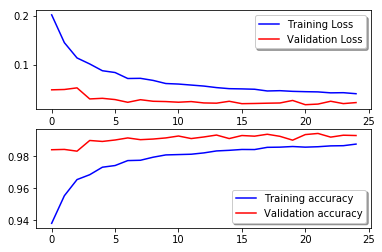

In [33]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss", axes=ax[0])
legend=ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r', label="Validation accuracy", axes=ax[1])
legend=ax[1].legend(loc='best', shadow=True)


### 3.2 Investigate errors

In [36]:
# predict the values from the test dataset
y_pred = large_model.predict(X_test)

# convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


In [37]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]

X_test_errors=X_test[errors]